In [1]:
import numpy as np

import sys
sys.path.append("..")

from matplotlib.colors import Normalize
from matplotlib import pyplot as plt
import japanize_matplotlib

In [2]:
accuracy_matrix_direct = np.load("../data/simulation/accuracy_direct_all.npy")[::5,::5]
accuracy_matrix_main = np.load("../data/simulation/accuracy_main2.npy")
accuracy_matrix_stepwise = np.load("../data/simulation/accuracy_stepwise.npy")[::5,::5]
accuracy_matrix_multi_start = np.load("../data/simulation/accuracy_multi_start.npy")
accuracy_matrix_grid_search = np.load("../data/simulation/accuracy_grid.npy")
solve_time_matrix_direct = np.load("../data/simulation/solve_time_direct_all.npy")[::5,::5]
solve_time_matrix_main = np.load("../data/simulation/solve_time_main2.npy")
solve_time_matrix_stepwise = np.load("../data/simulation/solve_time_stepwise.npy")[::5,::5]
solve_time_matrix_multi_start = np.load("../data/simulation/solve_time_multi_start.npy")
solve_time_matrix_grid_search = np.load("../data/simulation/solve_time_grid.npy")

print(accuracy_matrix_main)


[[1.25421713e-03 4.02129968e-04 1.99585486e-04 4.46199109e-04
  3.16626182e-04 5.39012079e-04 1.21556573e-04]
 [6.73260224e-04 3.48008152e-04 1.29139101e-04 1.25982441e-04
  1.13146796e-04 3.82122929e-04 7.53579820e-05]
 [5.23542857e-04 6.06935437e-04 2.22910142e-04 3.19619421e-04
  1.63406721e-04 4.66390784e-04 4.72218829e-04]
 [1.42997327e-03 1.81512499e-04 5.27215272e-04 1.88413568e-06
  7.28947255e-04 1.95085932e-04 9.34783504e-05]
 [1.53296185e-03 2.20220862e-04 3.65564141e-04 2.13369203e-04
  1.93672330e-04 2.14984829e-04 1.25869402e-04]
 [1.31131440e-03 4.00852392e-04 3.47047338e-04 1.79919338e-04
  2.99868331e-04 4.67609673e-04 3.41496026e-04]
 [8.20460528e-04 4.74194499e-04 6.38463986e-04 2.14667344e-04
  2.94427037e-04 2.87036663e-04 1.24672114e-04]
 [3.07760390e-04 7.51713027e-04 2.19125854e-04 1.77901238e-04
  1.97693874e-04 1.84046084e-04 8.40104258e-05]
 [1.02797391e-03 5.34466943e-04 8.61104202e-04 4.09870097e-04
  2.17941375e-04 4.55720544e-04 1.78728198e-04]]


0.011031373807549297


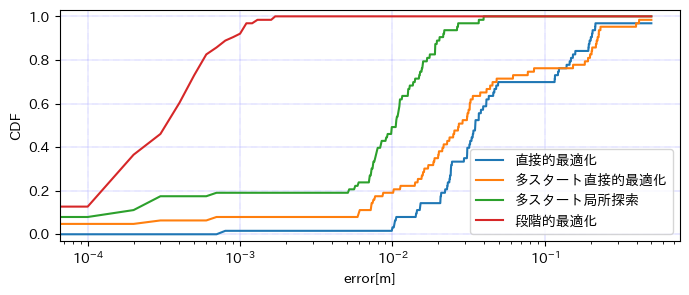

In [3]:
direct_cdf = np.array([np.count_nonzero(accuracy_matrix_direct < 0.0001*i)/accuracy_matrix_direct.size for i in np.arange(5001)])
stepwise_cdf = np.array([np.count_nonzero(accuracy_matrix_stepwise < 0.0001*i)/accuracy_matrix_stepwise.size for i in np.arange(5001)])
main_cdf = np.array([np.count_nonzero(accuracy_matrix_main < 0.0001*i)/accuracy_matrix_main.size for i in np.arange(5001)])
multi_start_cdf = np.array([np.count_nonzero(accuracy_matrix_multi_start < 0.0001*i)/accuracy_matrix_multi_start.size for i in np.arange(5001)])
grid_cdf = np.array([np.count_nonzero(accuracy_matrix_grid_search < 0.0001*i)/accuracy_matrix_grid_search.size for i in np.arange(5001)])
# direct_cdf = np.count_nonzero(accuracy_matrix_direct < 0.001*np.arange(101))
print(accuracy_matrix_grid_search.mean())

# fig,axes = plt.subplots(figsize=(8,3))
# axes.grid(color='b', linestyle=':', linewidth=0.3)
# axes.set_ylim(-0.03,1.03)
# axes.set_xlabel("error[m]")
# axes.set_ylabel("CDF")
# axes.legend()
fig,axes = plt.subplots(figsize=(8,3))
axes.plot(0.0001*np.arange(5001), direct_cdf, label="直接的最適化")
axes.plot(0.0001*np.arange(5001), multi_start_cdf, label="多スタート直接的最適化")
axes.plot(0.0001*np.arange(5001), grid_cdf, label="多スタート局所探索")
axes.plot(0.0001*np.arange(5001), stepwise_cdf, label="段階的最適化")
# axes.plot(0.0001*np.arange(5001), main_cdf, label="ノイズを含む段階的最適化")
axes.set_ylim(-0.03,1.03)
axes.set_xlabel("error[m]")
axes.set_ylabel("CDF")
axes.set_xscale("log")
axes.grid(color='b', linestyle=':', linewidth=0.3)
axes.legend()

23.26873015873016
35.42428571428572
40.193492063492066
320.9804761904763


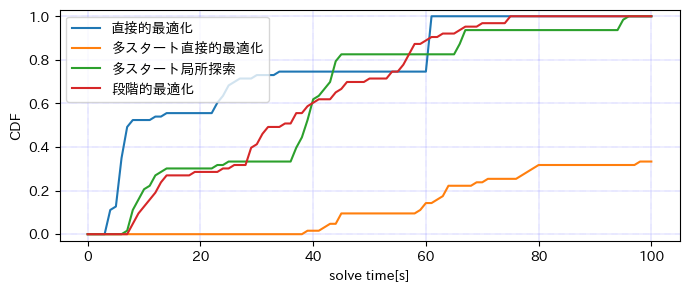

In [4]:
print(solve_time_matrix_direct.mean())
print(solve_time_matrix_stepwise.mean())
print(solve_time_matrix_main.mean())
print(solve_time_matrix_multi_start.mean())

direct_cdf = np.array([np.count_nonzero(solve_time_matrix_direct < i)/solve_time_matrix_direct.size for i in np.arange(101)])
stepwise_cdf = np.array([np.count_nonzero(solve_time_matrix_stepwise < i)/solve_time_matrix_stepwise.size for i in np.arange(101)])
main_cdf = np.array([np.count_nonzero(solve_time_matrix_main < i)/solve_time_matrix_main.size for i in np.arange(101)])
multi_start_cdf = np.array([np.count_nonzero(solve_time_matrix_multi_start < i)/solve_time_matrix_multi_start.size for i in np.arange(101)])
grid_search_cdf = np.array([np.count_nonzero(solve_time_matrix_grid_search < i)/solve_time_matrix_grid_search.size for i in np.arange(101)])
# direct_cdf = np.count_nonzero(accuracy_matrix_direct < 0.001*np.arange(101))

# fig,axes = plt.subplots(figsize=(8,3))
# axes.grid(color='b', linestyle=':', linewidth=0.3)
# axes.set_ylim(-0.03,1.03)
# axes.set_xlabel("solve time[s]")
# axes.set_ylabel("CDF")
# axes.legend()
fig,axes = plt.subplots(figsize=(8,3))
axes.plot(np.arange(101), direct_cdf, label="直接的最適化")
axes.plot(np.arange(101), multi_start_cdf, label="多スタート直接的最適化")
axes.plot(np.arange(101), grid_search_cdf, label="多スタート局所探索")
axes.plot(np.arange(101), stepwise_cdf, label="段階的最適化")
axes.set_ylim(-0.03,1.03)
axes.set_xlabel("solve time[s]")
axes.set_ylabel("CDF")
# axes.set_xscale("log")
axes.grid(color='b', linestyle=':', linewidth=0.3)
axes.legend()

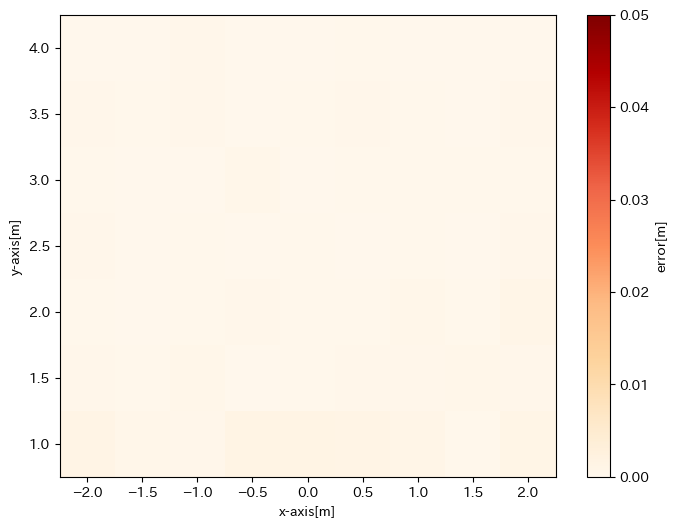

In [5]:
x_list = np.arange(-2,2.1,0.5)
y_list = np.arange(1.0,4.1,0.5)
Y_list, X_list = np.meshgrid(y_list, x_list)

fig, axes = plt.subplots(figsize=(8,6))
mappable = axes.pcolormesh(X_list, Y_list, accuracy_matrix_main, cmap='OrRd', norm=Normalize(vmin=0, vmax=0.05))
axes.set_xlabel("x-axis[m]")
axes.set_ylabel("y-axis[m]")
cb=fig.colorbar(mappable, ax=axes)
cb.set_label("error[m]")